In [10]:
import numpy as np; 
import matplotlib.pyplot as plt; 
import networkx as nx; 
import os, sys; 
from copy import copy; 
from mpl_toolkits.mplot3d import Axes3D; 
from pathlib import Path
import pandas as pd

In [22]:
routes = pd.read_csv('rutascorpus.csv')
routes = routes.drop('Unnamed: 0',axis = 1)
routes[115:]

routes['corpus'] = routes.route.apply(lambda x: x.split('/')[3].split('-')[-1])
str(routes[routes['language'] == 'Chinese']['corpus'])

'21    GSD\nName: corpus, dtype: object'

In [4]:
linelimit = 50000
selection = routes[routes['num_lines']>linelimit]
rutas = selection.route.to_list()
rutas[22]


'UsefulData/ud-treebanks/ud-treebanks/UD_Indonesian-GSD/id_gsd-ud-train.conllu'

In [2]:
from utils import file_generator

file_generator(numlines = 50000, routesfile='rutascorpus.csv',lemmatized = True)

39279
41619
41252
39892
36028
40158
43775
44608
30611
43919
38614
42891
39952
42486
40653
41102
43619
42435
42349
37306
43264
43447
41518
44046
41603
45334
39367
39752
39721
41720
32722
41850
34768
32470
38552
43028
35445
42305
41482
42289
40680
43991
35708
42368
43337
40204
37678
39110
44957
39788


In [3]:
from utils import network_gen,dict2json
for file in rutas:
    dic,frame=network_gen(file,linelimit=50000,lemmatized=0)
    name = file.split('/')[3].split('-')[0].replace('UD_','')
    dict2json(dic,f'dictionaries/{name}.json')
    frame = pd.DataFrame(frame).transpose()
    print(frame['count'].sum())
    frame.to_csv(f'dataframes/{name}.csv')


NameError: name 'rutas' is not defined

In [64]:
a = 0
if 1:
    a = 1
a

1

In [54]:
from utils import network_gen
dic,frame = network_gen(rutas[12],linelimit = 40000)
frame

# sent_id = train-v2-0
# text = På fredag har SID inviteret til reception i SID-huset i anledning af at formanden Kjeld Christensen går ind i de glade tressere.
1	På	på	ADP	_	AdpType=Prep	2	case	_	_
2	fredag	fredag	NOUN	_	Definite=Ind|Gender=Com|Number=Sing	5	obl	_	_
3	har	have	AUX	_	Mood=Ind|Tense=Pres|VerbForm=Fin|Voice=Act	5	aux	_	_
4	SID	SiD	PROPN	_	_	5	nsubj	_	_
5	inviteret	invitere	VERB	_	Definite=Ind|Number=Sing|Tense=Past|VerbForm=Part	0	root	_	_
6	til	til	ADP	_	AdpType=Prep	7	case	_	_
7	reception	reception	NOUN	_	Definite=Ind|Gender=Com|Number=Sing	5	obl	_	_
8	i	i	ADP	_	AdpType=Prep	9	case	_	_
9	SID-huset	SID-hus	NOUN	_	Definite=Def|Gender=Neut|Number=Sing	7	nmod	_	_
10	i	i	ADP	_	AdpType=Prep	11	case	_	_
11	anledning	anledning	NOUN	_	Definite=Ind|Gender=Com|Number=Sing	7	nmod	_	_
12	af	af	ADP	_	AdpType=Prep	17	mark	_	_
13	at	at	SCONJ	_	_	17	mark	_	_
14	formanden	formand	NOUN	_	Definite=Def|Gender=Com|Number=Sing	17	nsubj	_	_
15	Kjeld	Kjeld	PROPN	_	_	14	appos	_	_
16	Christensen

{1: {'word': 'på', 'POS': 'ADP', 'count': 434},
 2: {'word': 'fredag', 'POS': 'NOUN', 'count': 3},
 3: {'word': 'har', 'POS': 'AUX', 'count': 223},
 4: {'word': 'sid', 'POS': 'PROPN', 'count': 1},
 5: {'word': 'inviteret', 'POS': 'VERB', 'count': 2},
 6: {'word': 'til', 'POS': 'ADP', 'count': 419},
 7: {'word': 'reception', 'POS': 'NOUN', 'count': 1},
 8: {'word': 'i', 'POS': 'ADP', 'count': 958},
 9: {'word': 'sid-huset', 'POS': 'NOUN', 'count': 1},
 10: {'word': 'anledning', 'POS': 'NOUN', 'count': 2},
 11: {'word': 'af', 'POS': 'ADP', 'count': 407},
 12: {'word': 'at', 'POS': 'SCONJ', 'count': 328},
 13: {'word': 'formanden', 'POS': 'NOUN', 'count': 4},
 14: {'word': 'kjeld', 'POS': 'PROPN', 'count': 1},
 15: {'word': 'christensen', 'POS': 'PROPN', 'count': 5},
 16: {'word': 'går', 'POS': 'VERB', 'count': 25},
 17: {'word': 'ind', 'POS': 'ADV', 'count': 47},
 18: {'word': 'de', 'POS': 'DET', 'count': 222},
 19: {'word': 'glade', 'POS': 'ADJ', 'count': 2},
 20: {'word': 'tressere', '

In [55]:
from utils import csv2df
a = (pd.DataFrame(frame).transpose()).to_csv('prueba.csv')
b = csv2df('prueba.csv')
b['count'].sum()

17790

In [29]:
net = nx.Graph(); 
net.add_nodes_from(dicConnections.keys()); 
for (k, v) in dicConnections.items():
    net.add_edges_from(([(k, t) for t in v])); 

NameError: name 'dicConnections' is not defined

In [ ]:
plt.figure(); 
nx.draw(net, with_labels=False, pos=nx.kamada_kawai_layout(net)); 

plt.show(); 

In [10]:
mostfreq =a[a['count']>7].unique_id.to_list()
len(mostfreq)

394

In [35]:
new_net = {key:net[key] for key in mostfreq}

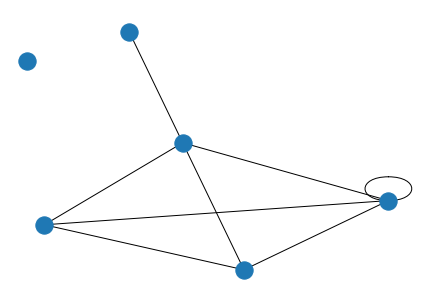

In [45]:
g = nx.Graph(); 
g.add_nodes_from(net.keys()); 
for (k, v) in net.items():
    g.add_edges_from(([(k, t) for t in v])); 
subg = g.subgraph(mostfreq)
plt.figure(); 
nx.draw(subg, with_labels=False, pos=nx.kamada_kawai_layout(subg)); 

plt.show(); 

In [12]:
import helper as h
netName = 'English'
netPath = 'networks/'
fNeighborMean, fNeighborStd = (True, True)
(nodeList, propertiesDict) = h.readNetworkProperties(netName, netPath, fNeighborMean, fNeighborStd); 
(includedProperties, excludedProperties) = h.findPathologicalProperties(propertiesDict); 
[key for key in propertiesDict.keys()][:15]

['degree',
 'eigenvectorCentrality',
 'betweennessCentrality',
 'closenessCentrality',
 'harmonicCentrality',
 'componentSize',
 'pagerank',
 'coreNumber',
 'onionLayer',
 'effectiveSize',
 'nodeCliqueNumber',
 'numberOfCliques',
 'clustering',
 'squareClustering',
 'closenessVitality']

In [22]:
from utils import build_properties_array_languages
arraymeanproperties,dict_pathologies = build_properties_array_languages('networks/')
arraymeanpropertieslemma, dict_pathologies_lemma = build_properties_array_languages('networkslemma/')

{'componentSize_neighborStd', 'closenessVitality_neighborMean', 'componentSize', 'nodeCliqueNumber', 'coreNumber', 'coreNumber_neighborMean', 'nodeCliqueNumber_neighborStd', 'nodeCliqueNumber_neighborMean', 'closenessVitality', 'componentSize_neighborMean', 'coreNumber_neighborStd'}
{'componentSize_neighborStd', 'closenessVitality_neighborMean', 'componentSize', 'closenessVitality', 'componentSize_neighborMean'}


In [8]:
from utils import build_language_mean_dict
meanpropertiesDict, excludedProperties = build_language_mean_dict('Spanish','networks/',True,True)
meanpropertiesDict.keys()

dict_keys(['degree', 'eigenvectorCentrality', 'betweennessCentrality', 'closenessCentrality', 'harmonicCentrality', 'componentSize', 'pagerank', 'coreNumber', 'onionLayer', 'effectiveSize', 'nodeCliqueNumber', 'numberOfCliques', 'clustering', 'squareClustering', 'closenessVitality', 'constraint', 'degree_neighborMean', 'eigenvectorCentrality_neighborMean', 'betweennessCentrality_neighborMean', 'closenessCentrality_neighborMean', 'harmonicCentrality_neighborMean', 'componentSize_neighborMean', 'pagerank_neighborMean', 'coreNumber_neighborMean', 'onionLayer_neighborMean', 'effectiveSize_neighborMean', 'nodeCliqueNumber_neighborMean', 'numberOfCliques_neighborMean', 'clustering_neighborMean', 'squareClustering_neighborMean', 'closenessVitality_neighborMean', 'constraint_neighborMean', 'degree_neighborStd', 'eigenvectorCentrality_neighborStd', 'betweennessCentrality_neighborStd', 'closenessCentrality_neighborStd', 'harmonicCentrality_neighborStd', 'componentSize_neighborStd', 'pagerank_nei

{'componentSize_neighborStd', 'componentSize_neighborMean', 'componentSize'}
{'componentSize_neighborStd', 'componentSize_neighborMean', 'componentSize'}
Noise-trucating PC value is: 0.0958283355185123
According to this, optimal number of PCs kept is: 6
This is a fraction 0.375 of eigenvalues. 
Noise-trucating PC value is: 0.11718053281173313
According to this, optimal number of PCs kept is: 6
This is a fraction 0.375 of eigenvalues. 


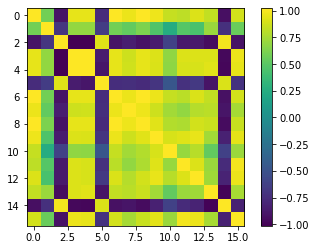

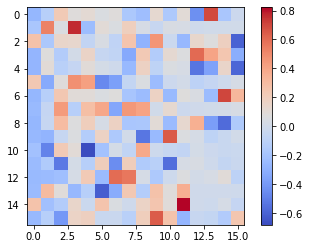

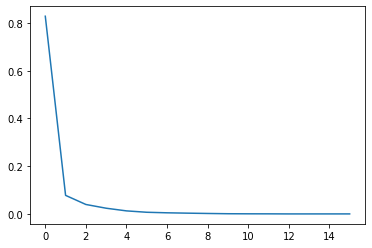

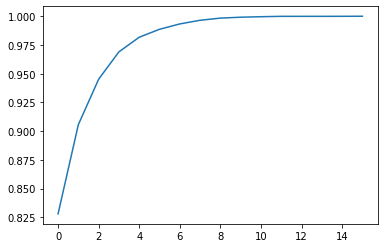

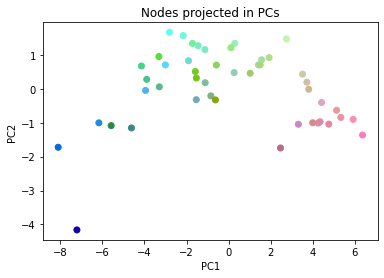

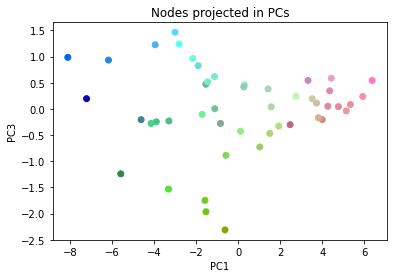

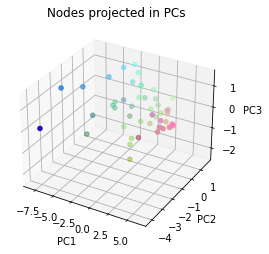

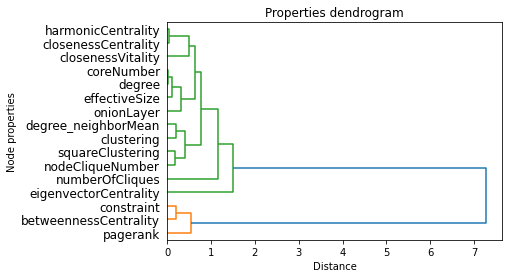

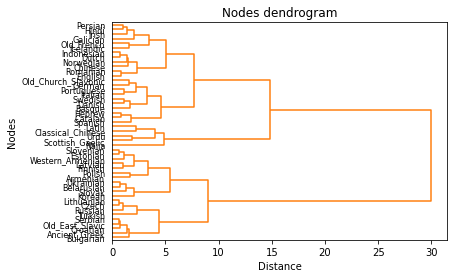

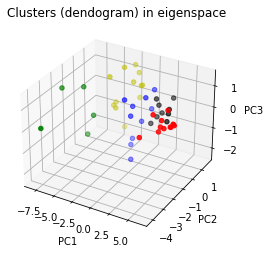

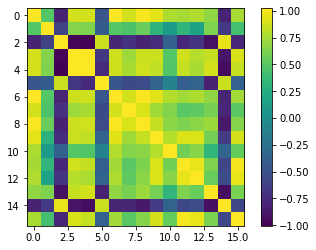

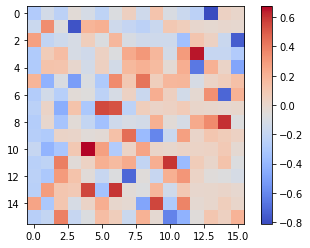

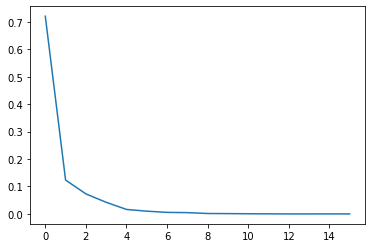

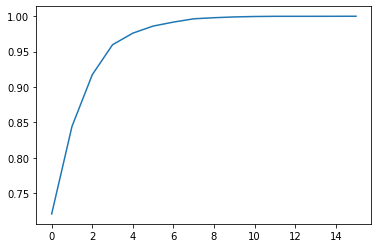

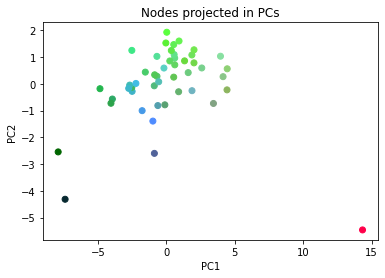

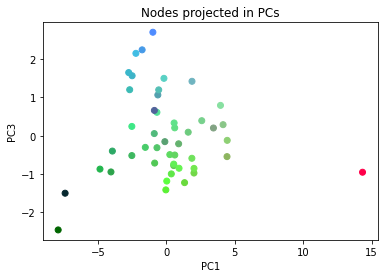

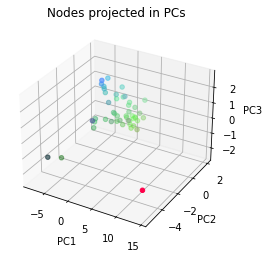

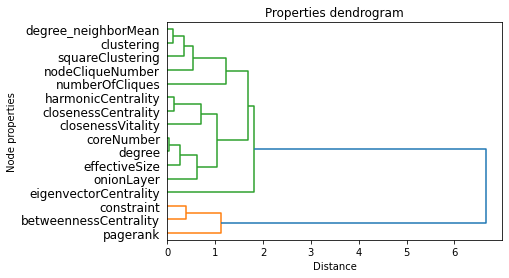

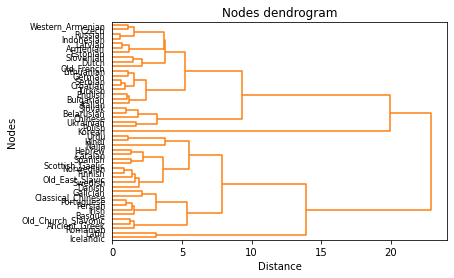

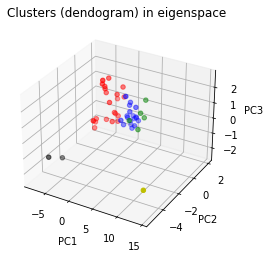

In [1]:
# Importing relevant libraries: 
#import pandas as pd
import numpy as np; 
import matplotlib.pyplot as plt; 
import matplotlib as mplt; 
import networkx as nx; 
import scipy.cluster.hierarchy as spc; 
#from copy import copy; 
# For 3D scatter: 
#from mpl_toolkits.mplot3d import Axes3D; 

# Importing libraries for I/O and system communication: 
import os, sys; 
#import pickle as pkl; 
#import scipy.io as sio; # To read .mat files! and .mnx files! 

# Importing functions for clustering: 
#from sklearn.cluster import KMeans;  
#import scipy.cluster.hierarchy as spc; 

# Importing homebrew libraries: 
import helper as h
from utils import build_properties_array_languages; 
#import loadHelper as lh; 


clusterStyles = {}; 
clusterStyles[0] = 'k'; 
clusterStyles[1] = 'r'; 
clusterStyles[2] = 'g'; 
clusterStyles[3] = 'b'; 
clusterStyles[4] = 'y'; 
clusterStyles[5] = 'm'; 
clusterStyles[6] = 'c'; 
clusterStyles[7] = 'tab:gray'; 

valid1, arraymeanproperties,dict_pathologies, list_excluded = build_properties_array_languages('files/inflected/networks/',primaries = True)
valid2, arraymeanpropertieslemma, dict_pathologies_lemma,list_excluded_lemma = build_properties_array_languages('files/lemmatized/networks/',primaries = True)
arraymeanproperties = h.normalizeProperties(arraymeanproperties)
arraymeanpropertieslemma = h.normalizeProperties(arraymeanpropertieslemma)
paths = ['files/inflected/languagesmean/','files/lemmatized/languagesmean'] 
filelist = os.listdir('./files/inflected/dictionaries/')
nodeList = [file.split('.')[0] for file in filelist if file not in ['Japanese.json','Arabic.json','French.json']]
valid_keys = [valid1, valid2]

for indexlang, includedPropertiesArray in enumerate([arraymeanproperties,arraymeanpropertieslemma]):
    picsPath = paths[indexlang]
    includedProperties = valid_keys[indexlang]
    allStatisticsCov = np.cov(includedPropertiesArray); 
    (eigVals, eigVects) = np.linalg.eig(allStatisticsCov); 
    eigVals = np.real(eigVals); 
    eigVects = np.real(eigVects); 


    # Computing PCs with information above noise level according to ref: 
    # 	Donoho DL, Gavish M. 
    # 	The optimal hard threshold for singular values is 4/√3. 
    # 	arXiv preprint arXiv:1305.5870, (2013).
    (noiseThreshold, nKeep) = h.computeComponentsAboveNoise(eigVals); 
    print("Noise-trucating PC value is: " + str(noiseThreshold)); 
    print("According to this, optimal number of PCs kept is: " + str(nKeep)); 
    print("This is a fraction " + str(float(nKeep)/len(eigVals)) + " of eigenvalues. "); 

    # Plotting covariance matrix: 
    plt.figure(); 
    plt.imshow(allStatisticsCov, interpolation="none"); 
    plt.colorbar(); 

    # Plotting eigenvectors: 
    plt.figure(); 
    plt.imshow(eigVects, interpolation="none", cmap="coolwarm"); 
    plt.colorbar(); 


    # Computing and plotting variance explained: 
    (varianceExplained, varianceExplained_cumul) = h.varianceExplained(eigVals); 

    plt.figure(); 
    plt.plot(varianceExplained); 

    plt.figure(); 
    plt.plot(varianceExplained_cumul); 



    ## Projecting data into eigenspace: 
    includedPropertiesArray_ = np.dot(np.transpose(eigVects), includedPropertiesArray); 

    # Using first three PCs as color coding: 
    # 	Normalize components to [0,1]; 
    valuesRGB0 = h.convertPC2RGB(includedPropertiesArray_[0,:]); 
    valuesRGB1 = h.convertPC2RGB(includedPropertiesArray_[1,:]); 
    valuesRGB2 = h.convertPC2RGB(includedPropertiesArray_[2,:]); 
    # Save hex color values to a list: 
    nodeColor = []; 
    for (iNode, node) in enumerate(nodeList): 
        nodeColor += [mplt.colors.to_hex([valuesRGB0[iNode], valuesRGB1[iNode], valuesRGB2[iNode]])]; 


    # PC1-PC2: 
    fig = plt.figure(); 
    ax = fig.add_subplot(111); 
    plt.scatter(includedPropertiesArray_[0,:], includedPropertiesArray_[1,:], c=nodeColor); 
    plt.xlabel("PC1"); 
    plt.ylabel("PC2"); 
    plt.title("Nodes projected in PCs"); 
    fig.savefig(picsPath + "projection_PCs1-2.pdf"); 

    # PC1-PC3: 
    fig = plt.figure(); 
    plt.scatter(includedPropertiesArray_[0,:], includedPropertiesArray_[2,:], c=nodeColor); 
    plt.xlabel("PC1"); 
    plt.ylabel("PC3"); 
    plt.title("Nodes projected in PCs"); 
    fig.savefig(picsPath + "projection_PCs1-3.pdf"); 

    # PC1-PC2-PC3: 
    fig = plt.figure(); 
    ax = fig.add_subplot(111, projection='3d'); 
    ax.scatter(includedPropertiesArray_[0,:], includedPropertiesArray_[1,:], includedPropertiesArray_[2,:], c=nodeColor); 
    ax.set_xlabel("PC1"); 
    ax.set_ylabel("PC2"); 
    ax.set_zlabel("PC3"); 
    plt.title("Nodes projected in PCs"); 
    fig.savefig(picsPath + "projection_PCs1-2-3.pdf"); 

    # Plotting in network space: 
    """"
    fig = plt.figure(); 
    ax = fig.add_subplot(111); 
    nx.draw(thisNetwork, with_labels=False, pos=nx.kamada_kawai_layout(thisNetwork), node_color=nodeColor, edge_color="tab:gray"); 
    ax.set_aspect("equal"); 
    plt.title("PC colors projected in network layout"); 
    fig.savefig(picsPath + "networkColoredWithPCs_netLayout.pdf");
    """

    pdist = spc.distance.pdist(allStatisticsCov); 
    propertiesLinkage = spc.linkage(pdist, method='complete'); 

    fig = plt.figure(); 
    spc.dendrogram(propertiesLinkage, orientation="right", labels=includedProperties); 
    plt.xlabel("Distance"); 
    plt.ylabel("Node properties"); 
    plt.title("Properties dendrogram"); 
    fig.savefig(picsPath + "propertiesDendogram.pdf"); 


    ## Dendograms for data: 
    nodesLinkage = spc.linkage(includedPropertiesArray_.T, 'ward'); 

    distanceThreshold = 45; 
    fig = plt.figure(); 
    spc.dendrogram(nodesLinkage, orientation="right", color_threshold=distanceThreshold, labels=nodeList); 
    plt.xlabel("Distance"); 
    plt.ylabel("Nodes"); 
    plt.title("Nodes dendrogram"); 
    fig.savefig(picsPath + "nodesDendogram.pdf"); 


    # Coloring according to clusters: 
    # nodeClusters = spc.fcluster(nodesLinkage, distanceThreshold, criterion='distance'); 
    nClusters = 5; 
    nodeClusters = spc.fcluster(nodesLinkage, nClusters, criterion="maxclust"); 
    nodeClusterColor = []; 
    for (iNode, node) in enumerate(nodeList): 
        nodeClusterColor += [clusterStyles[nodeClusters[iNode]-1]]; 


    # Plotting in eigenspace: 
    fig = plt.figure(); 
    ax = fig.add_subplot(111, projection='3d'); 
    ax.scatter(includedPropertiesArray_[0,:], includedPropertiesArray_[1,:], includedPropertiesArray_[2,:], c=nodeClusterColor); 
    ax.set_xlabel("PC1"); 
    ax.set_ylabel("PC2"); 
    ax.set_zlabel("PC3"); 
    plt.title("Clusters (dendogram) in eigenspace"); 
    fig.savefig(picsPath + "dendogramClusters_eigenspace.pdf"); 

In [3]:
valid1

['degree',
 'eigenvectorCentrality',
 'betweennessCentrality',
 'closenessCentrality',
 'harmonicCentrality',
 'pagerank',
 'coreNumber',
 'onionLayer',
 'effectiveSize',
 'nodeCliqueNumber',
 'numberOfCliques',
 'clustering',
 'squareClustering',
 'closenessVitality',
 'constraint',
 'degree_neighborMean']

In [1]:
from utils import build_properties_array_languages
valid1, arraymeanproperties,dict_pathologies, list_excluded, totals = build_properties_array_languages('files/inflected/networks/',primaries = True)

{'componentSize', 'componentSize_neighborStd', 'componentSize_neighborMean'}


In [3]:
from utils import load_network, csv2df

netName = 'Spanish'
folderframe = 'files/inflected/dataframes'
folderdict = 'files/inflected/dictionaries'
langframe = csv2df(f'{folderframe}/{netName}.csv')
mostfreq =langframe.unique_id.to_list()
jsonfile = f'{folderdict}/{netName}.json'
thisNetwork = load_network(jsonfile)
thisNetwork=thisNetwork.subgraph(mostfreq)

Gcc = sorted(nx.connected_components(thisNetwork), key=len, reverse=True); 
thisNetwork = nx.Graph(thisNetwork.subgraph(Gcc[0])); 
nNodes = len(thisNetwork.nodes()); 
nEdges = thisNetwork.number_of_edges(); 